# <center><h1 style = "color:navy;">Principal Component Analysis(PCA)</h1></center>

In [109]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

## <h1 style="color:indigo">1.  Exploratory Data Analysis(EDA)</h1>

### <h2 style="color:purple">a. Data Exploration</h2>

In [110]:
wine = pd.read_csv("wine.csv")
wine.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [111]:
wine.shape

(178, 14)

The dataset contains the information on contents of wine types. We have less rows(178) but have 14 columns

In [112]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Here’s a **brief significance and possible associations** for each feature:  

1. **Type** – Wine category.  
2. **Alcohol** –byproduct of fermentation that affects the wine’s body, flavor, and warmth while also acting as a preservative.  
3. **Malic Acid** – contributes to wine's tartness and acidity. A higher concentration may be found in younger or less ripe wines.  
4. **Ash** – Mineral content.  
5. **Alcalinity** – Measures wine pH stability.  
6. **Magnesium** – Essential mineral.  
7. **Total Phenols** – Key for taste, color, and health benefits.  
8. **Flavanoids** – Contribute to bitterness and antioxidant properties.  
9. **Nonflavonoid Phenols** – Phenolic compounds in plants that do not belong to the flavonoid group.  
10. **Proanthocyanins** – Affect wine color and texture.  
11. **Color Intensity** – Indicates richness of wine color.  
12. **Hue** – Determines red vs. brownish tones.  
13. **Dilution (OD280/OD315)** – Measures wine’s polyphenol content.  
14. **Proline** – Amino acid influencing sweetness.  



In [113]:
wine.nunique()

Type                 3
Alcohol            126
Malic              133
Ash                 79
Alcalinity          63
Magnesium           53
Phenols             97
Flavanoids         132
Nonflavanoids       39
Proanthocyanins    101
Color              132
Hue                 78
Dilution           122
Proline            121
dtype: int64

In [114]:
wine.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

The dataset looks almost clean

In [115]:
wine.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

### <h2 style="color:purple">b. Feature Analysis</h2>

#### <h3 style="color:midnightblue">Univariate Analysis</h3>

1. Type

We won't be using this variable as a feature as it is a categorical variable and it may disort the clustering results.

In [116]:
wine['Type'] = wine['Type'].astype("category")  #converting into categorical type

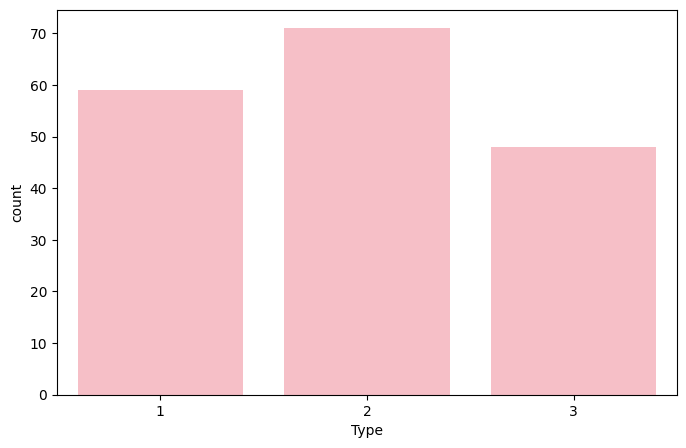

In [117]:
# Define dark pastel color for barplot
count_color = "#FFB6C1"   # Light Pink

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 5)) 
sns.countplot(x="Type", data=wine, color=count_color, ax=ax)
plt.show()

This bar plot shows the distribution of different wine types in the dataset. The height of each bar represents the number of samples for each type. There is not much of a difference in the bar heights. We don't have major class imbalance.

In [118]:
wine['Type'].value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

2. Alcohol

In [119]:
# Define dark pastel colors
hist_color = "#6A5ACD"  # Pastel Purple (Slate Blue)
kde_line_color = "#800080"   # Dark Purple for KDE Line
box_color = "#3CB371"   # Pastel Green (Medium Sea Green)

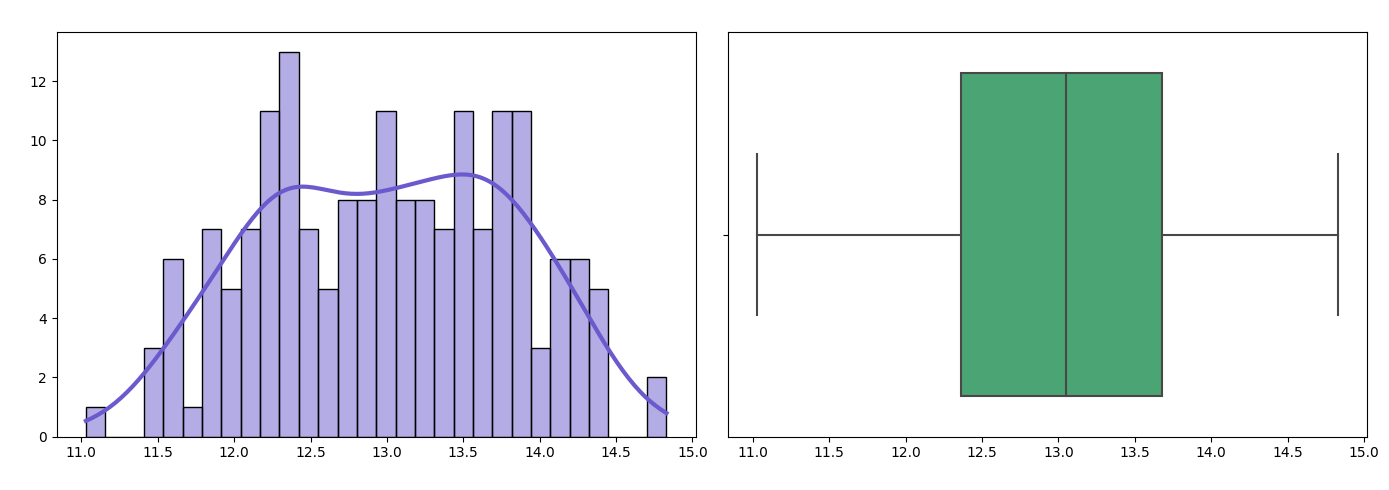

In [120]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    wine['Alcohol'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram_
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Alcohol", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=wine['Alcohol'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Alcohol", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


Alcohol doesnt have any outlier and distribution looks almost like a flat bell curve indicating the points are wide spread out around the mean

3. Malic

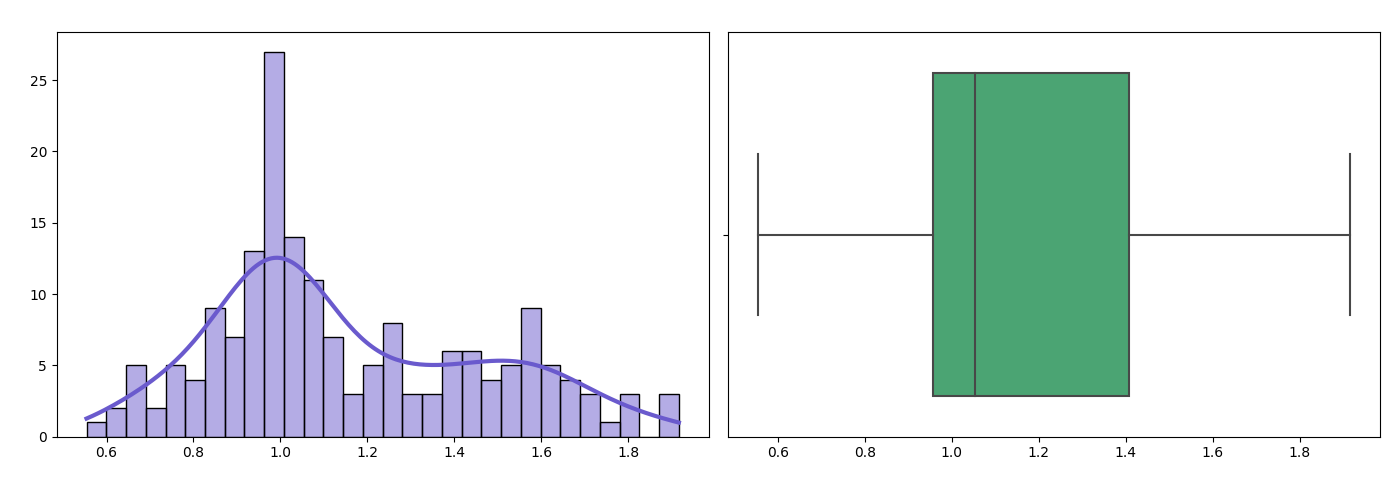

In [121]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
     np.log1p(wine['Malic']), bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram_
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Malic", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x= np.log1p(wine['Malic']), color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Malic", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


Malic has three outliers and the distribution is positively skewed. Hence the above distribution is log transformed which removed the outliers and the distribution looks less skewed. The log-transformed histogram helps normalize skewed distributions, making patterns clearer. It reduces extreme values' influence, improving interpretability and potential clustering performance.

We will be using log transformation for every positive skewed features.

In [122]:
wine['Log_malic'] =  np.log1p(wine['Malic'])

4. Ash   

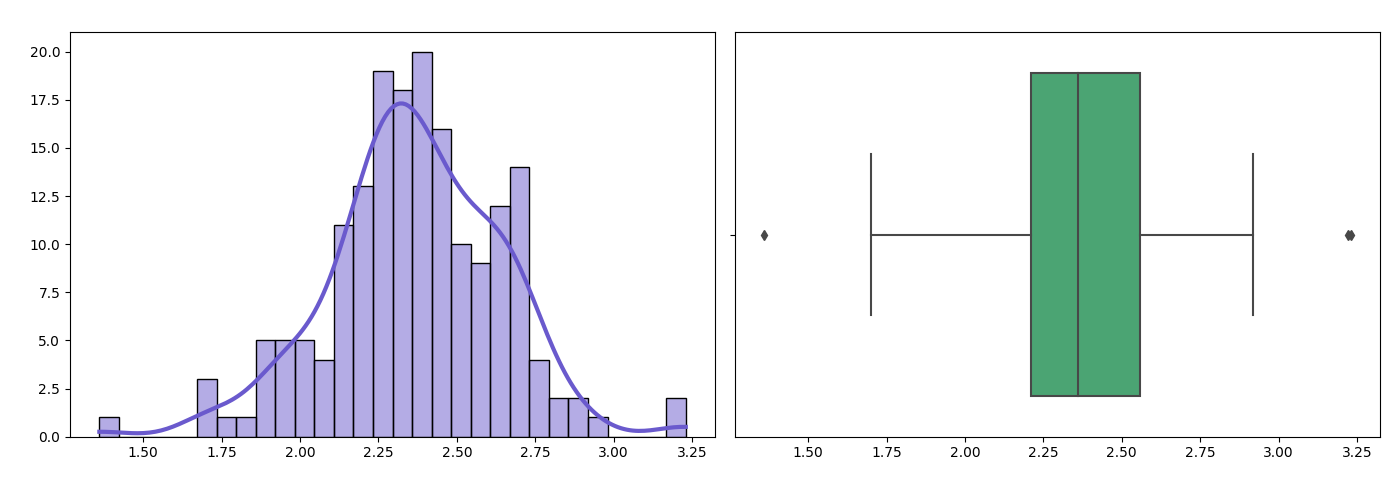

In [123]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    wine['Ash'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram_
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Ash", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=wine['Ash'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Ash", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


The distribution is almost bell curved, and have just two outliers. We will cap those outtliers.

In [124]:
p99 = wine['Ash'].quantile(0.99)
p99

2.9889999999999968

In [125]:
p1 = wine['Ash'].quantile(0.01)
p1

1.7

In [126]:
wine.loc[p99<wine['Ash'],'Ash']= p99

In [127]:
wine.loc[p1>wine['Ash'],'Ash']=p1

5. Alcalinity 

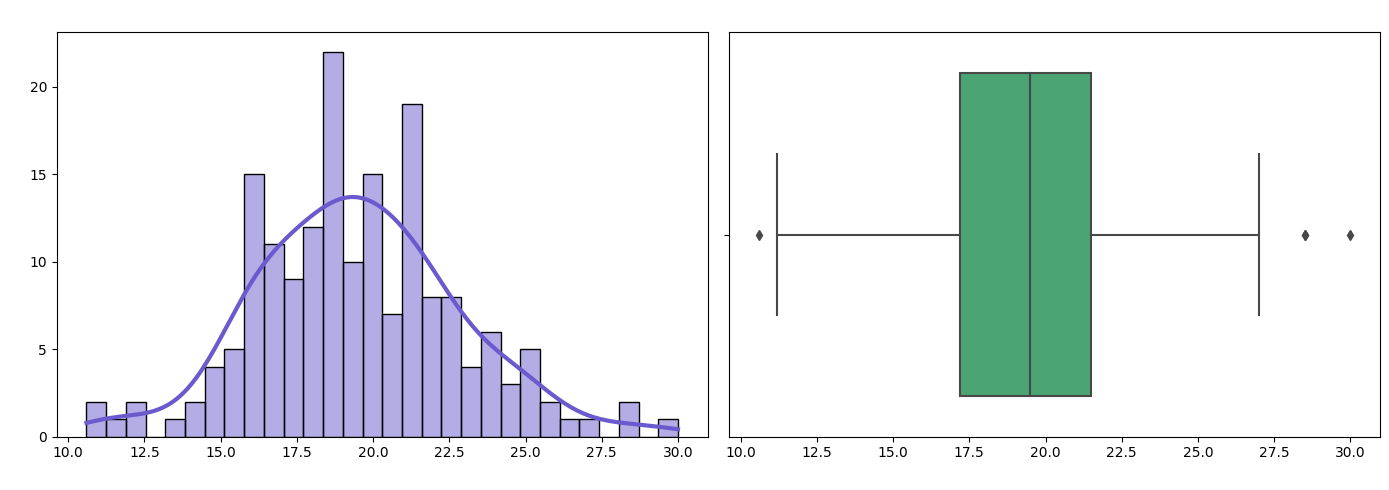

In [128]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    wine['Alcalinity'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram_
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Alcalinity", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=wine['Alcalinity'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Alcalinity", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


We will cap the outliers for Alcalinity. The  distribution almost looks like a bell curve

In [129]:
p98 = wine['Alcalinity'].quantile(0.98)
p98

26.730000000000004

In [130]:
p2 = wine['Alcalinity'].quantile(0.02)
p2

12.216000000000001

In [131]:
wine.loc[p98<wine['Alcalinity'],'Alcalinity']= p98
wine.loc[p2>wine['Alcalinity'],'Alcalinity']=p2

6. Magnesium   

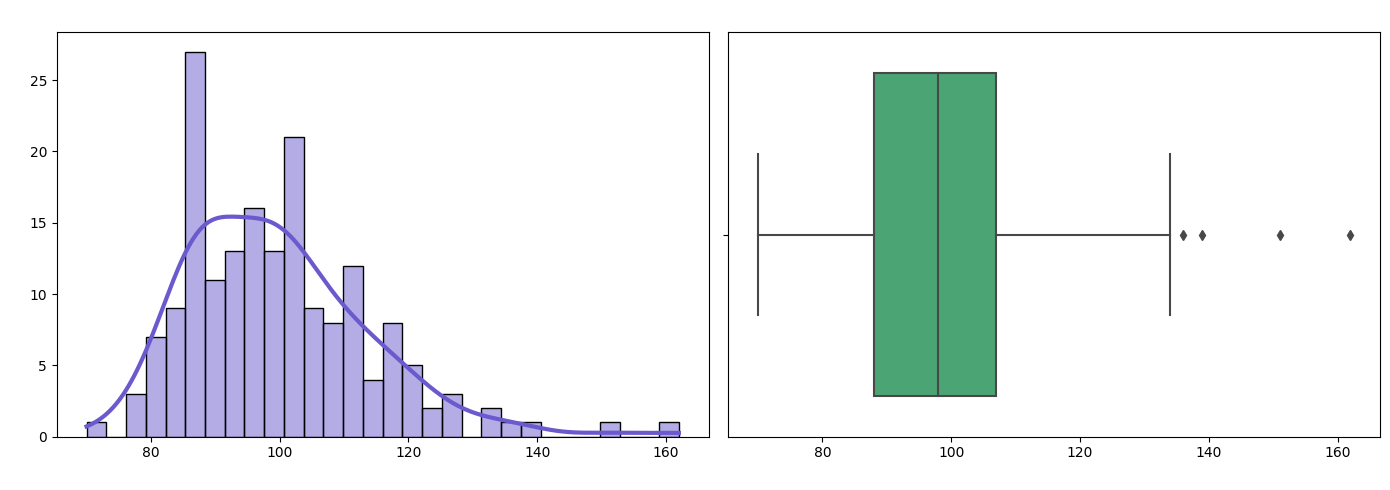

In [132]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    wine['Magnesium'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram_
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Magnesium", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=wine['Magnesium'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Magnesium", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


We will cap the outliers at the right end and the distribution will look like a bell curve.

In [133]:
p98 = wine['Magnesium'].quantile(0.98)
p98

134.92000000000002

In [134]:
wine.loc[p98<wine['Magnesium'],'Magnesium']= p98

7. Phenols   

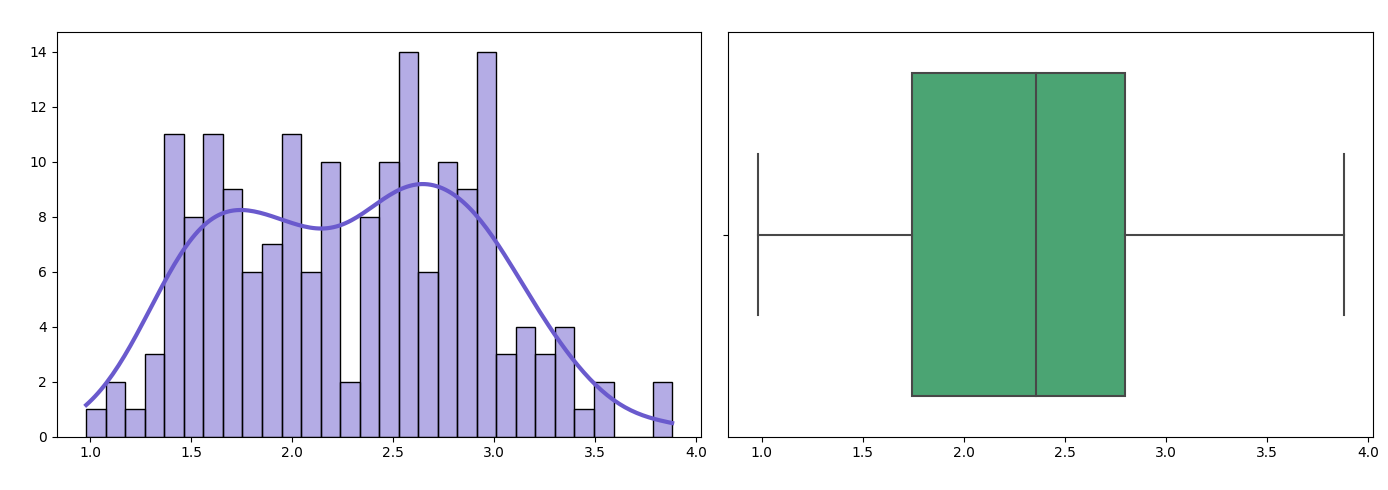

In [135]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    wine['Phenols'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram_
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Phenols", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=wine['Phenols'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Phenols", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


We have two peaks in this distribution,potientially indicating a possibility of having clusters

8. Flavanoids

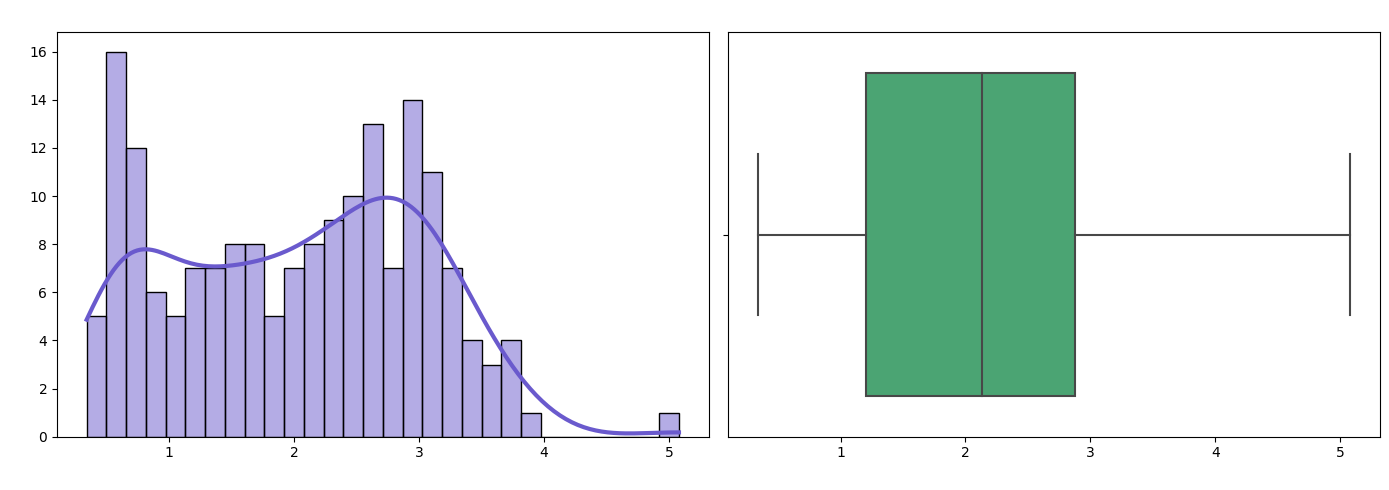

In [136]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    wine['Flavanoids'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram_
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Flavanoids", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=wine['Flavanoids'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Flavanoids", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


We can see that there is two peaks at this distribution too. One peak is at 0.5 and another one just after 2.5

9. Nonflavanoids    

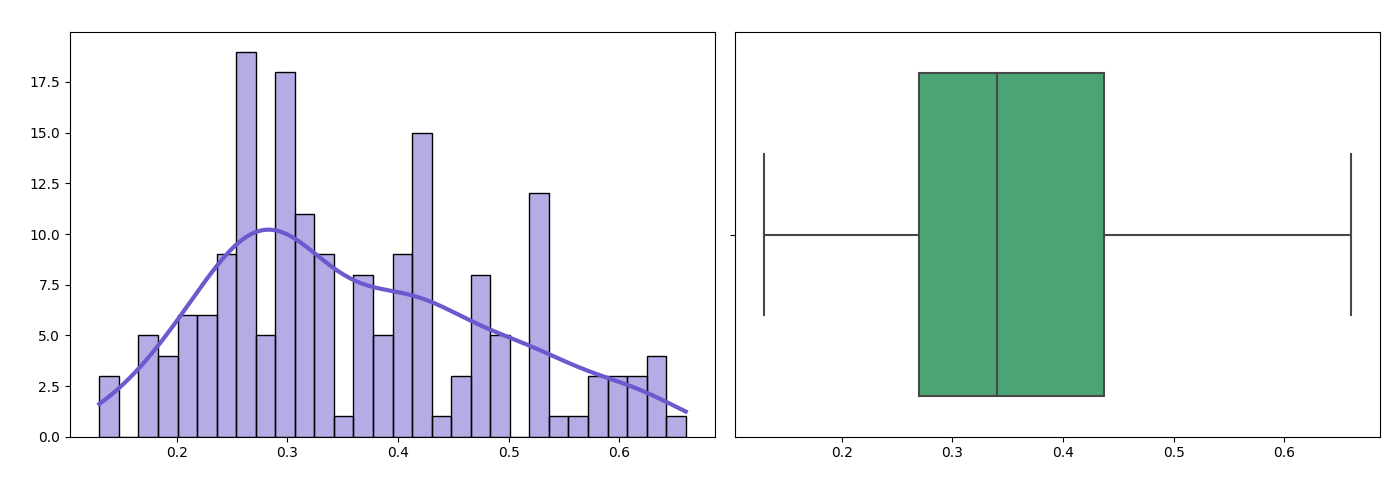

In [137]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    wine['Nonflavanoids'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram_
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Nonflavanoids", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=wine['Nonflavanoids'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Nonflavanoids", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


The distribution of Non Flavonoids are in varying ranges switching between high and lows.

10. Proanthocyanins 

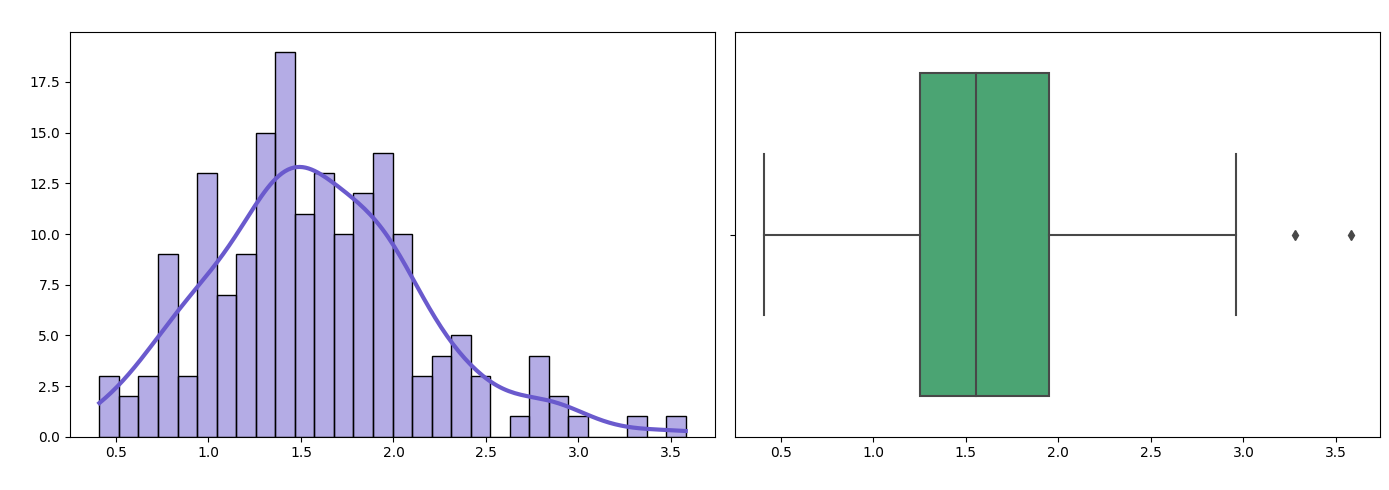

In [138]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    wine['Proanthocyanins'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram_
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Proanthocyanins", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=wine['Proanthocyanins'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Proanthocyanins", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


The distribution looks almost a bell curve and heavy tailed towards the right. We will just cap the outliers.

In [139]:
p95 = wine['Proanthocyanins'].quantile(0.95)
p95

2.7090000000000005

In [140]:
wine.loc[p95<wine['Proanthocyanins'],'Proanthocyanins']= p95

11. Color 

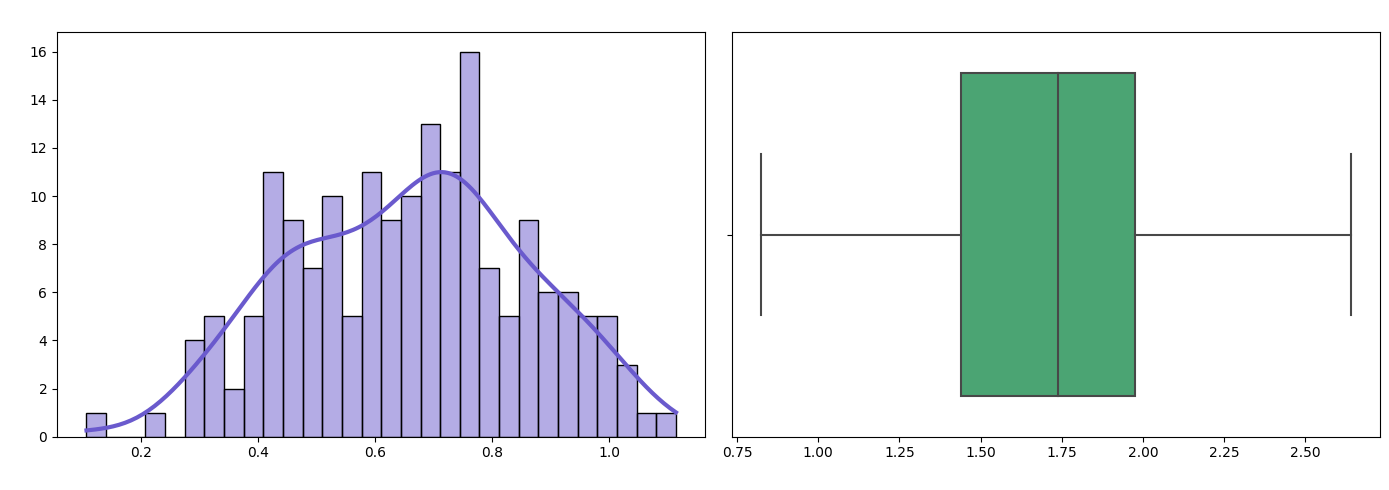

In [141]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    np.log10(wine['Color']), bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram_
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Color", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=np.log1p(wine['Color']), color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Color", color="white")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


Color had outliers and the distribution is positively skewed. Hence the above distribution is log transformed which removed the outliers and the distribution looks less skewed. we will create a new column for logarthmic Malic

In [142]:
wine['Log_color'] =  np.log1p(wine['Color'])

12.Hue   

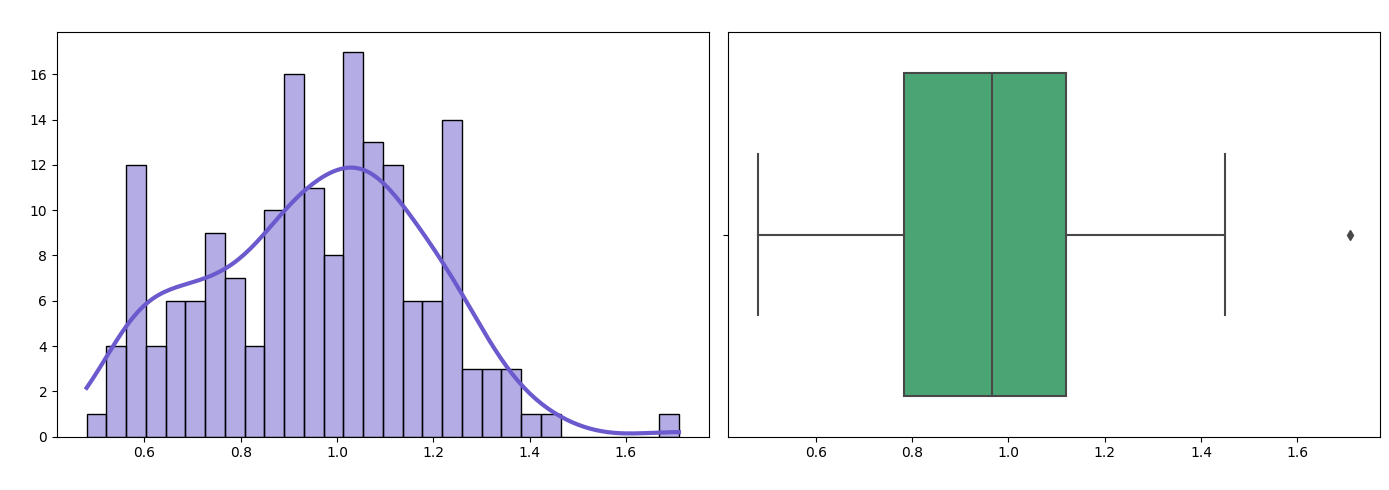

In [143]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    wine['Hue'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram_
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Hue", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=wine['Hue'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Hue", color="white")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


We can see the one outlier is far out at the end. We will just cap the outlier at 99th percentile

In [144]:
p99 = wine['Hue'].quantile(0.99)
p99

1.4268999999999996

In [145]:
wine.loc[p99<wine['Hue'],'Hue']= p99

13. Dilution    

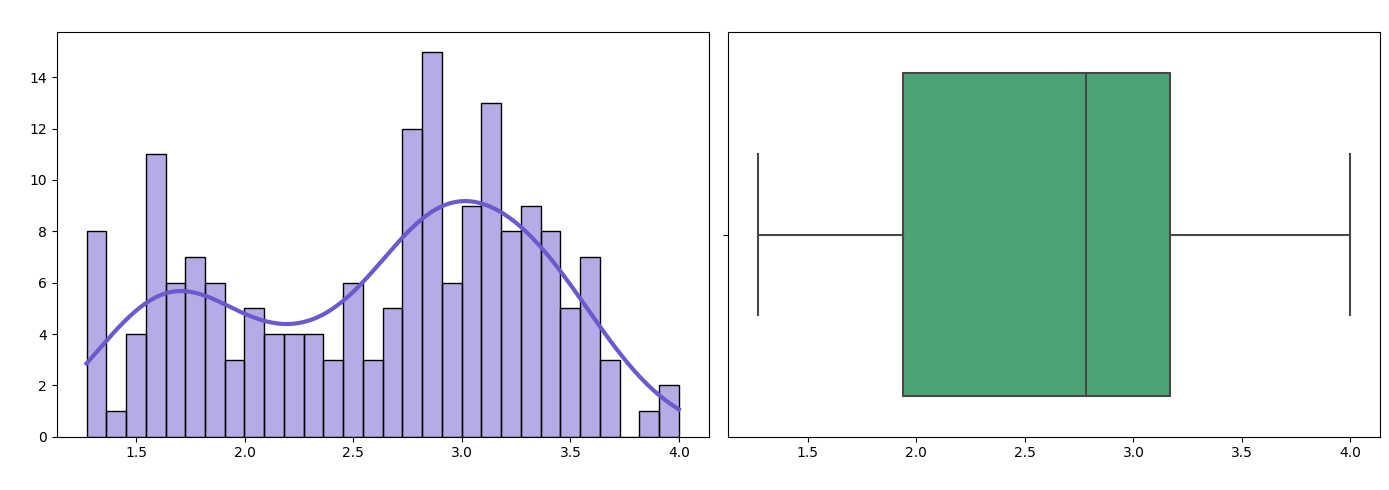

In [146]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    wine['Dilution'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram_
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Dilution", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=wine['Dilution'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Dilution", color="white")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


We can see two peaks for Dilution distribution too, potentially a sign of having possible clusters.

14. Proline

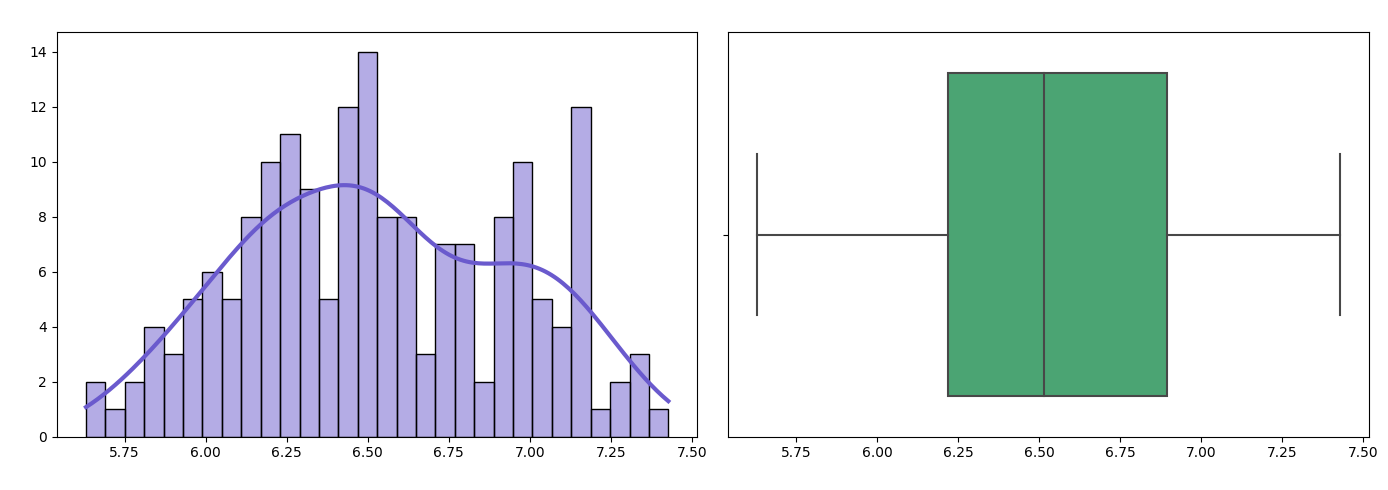

In [147]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    np.log1p(wine['Proline']), bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram_
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Proline", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=np.log1p(wine['Proline']), color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Proline", color="white")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


We will log transform Proline to adjust the positive skewness in the distribution

In [148]:
wine['Log_proline'] =  np.log1p(wine['Proline'])

We will use some more rations in our dataset as features

1. Phenol-to-Flavonoid Ratio = Phenols / Flavanoids
2. Color Intensity to Hue Ratio = Color / Hue
3. Proline Normalized by Alcohol = Proline / Alcohol

In [149]:
wine['PF'] = wine['Phenols']/ wine['Flavanoids']
wine['CH'] = wine['Color']/ wine['Hue']
wine['PA'] = wine['Proline']/ wine['Alcohol']

#### <h3 style="color:midnightblue">Multivariate Analysis</h3>

1. Pairplot

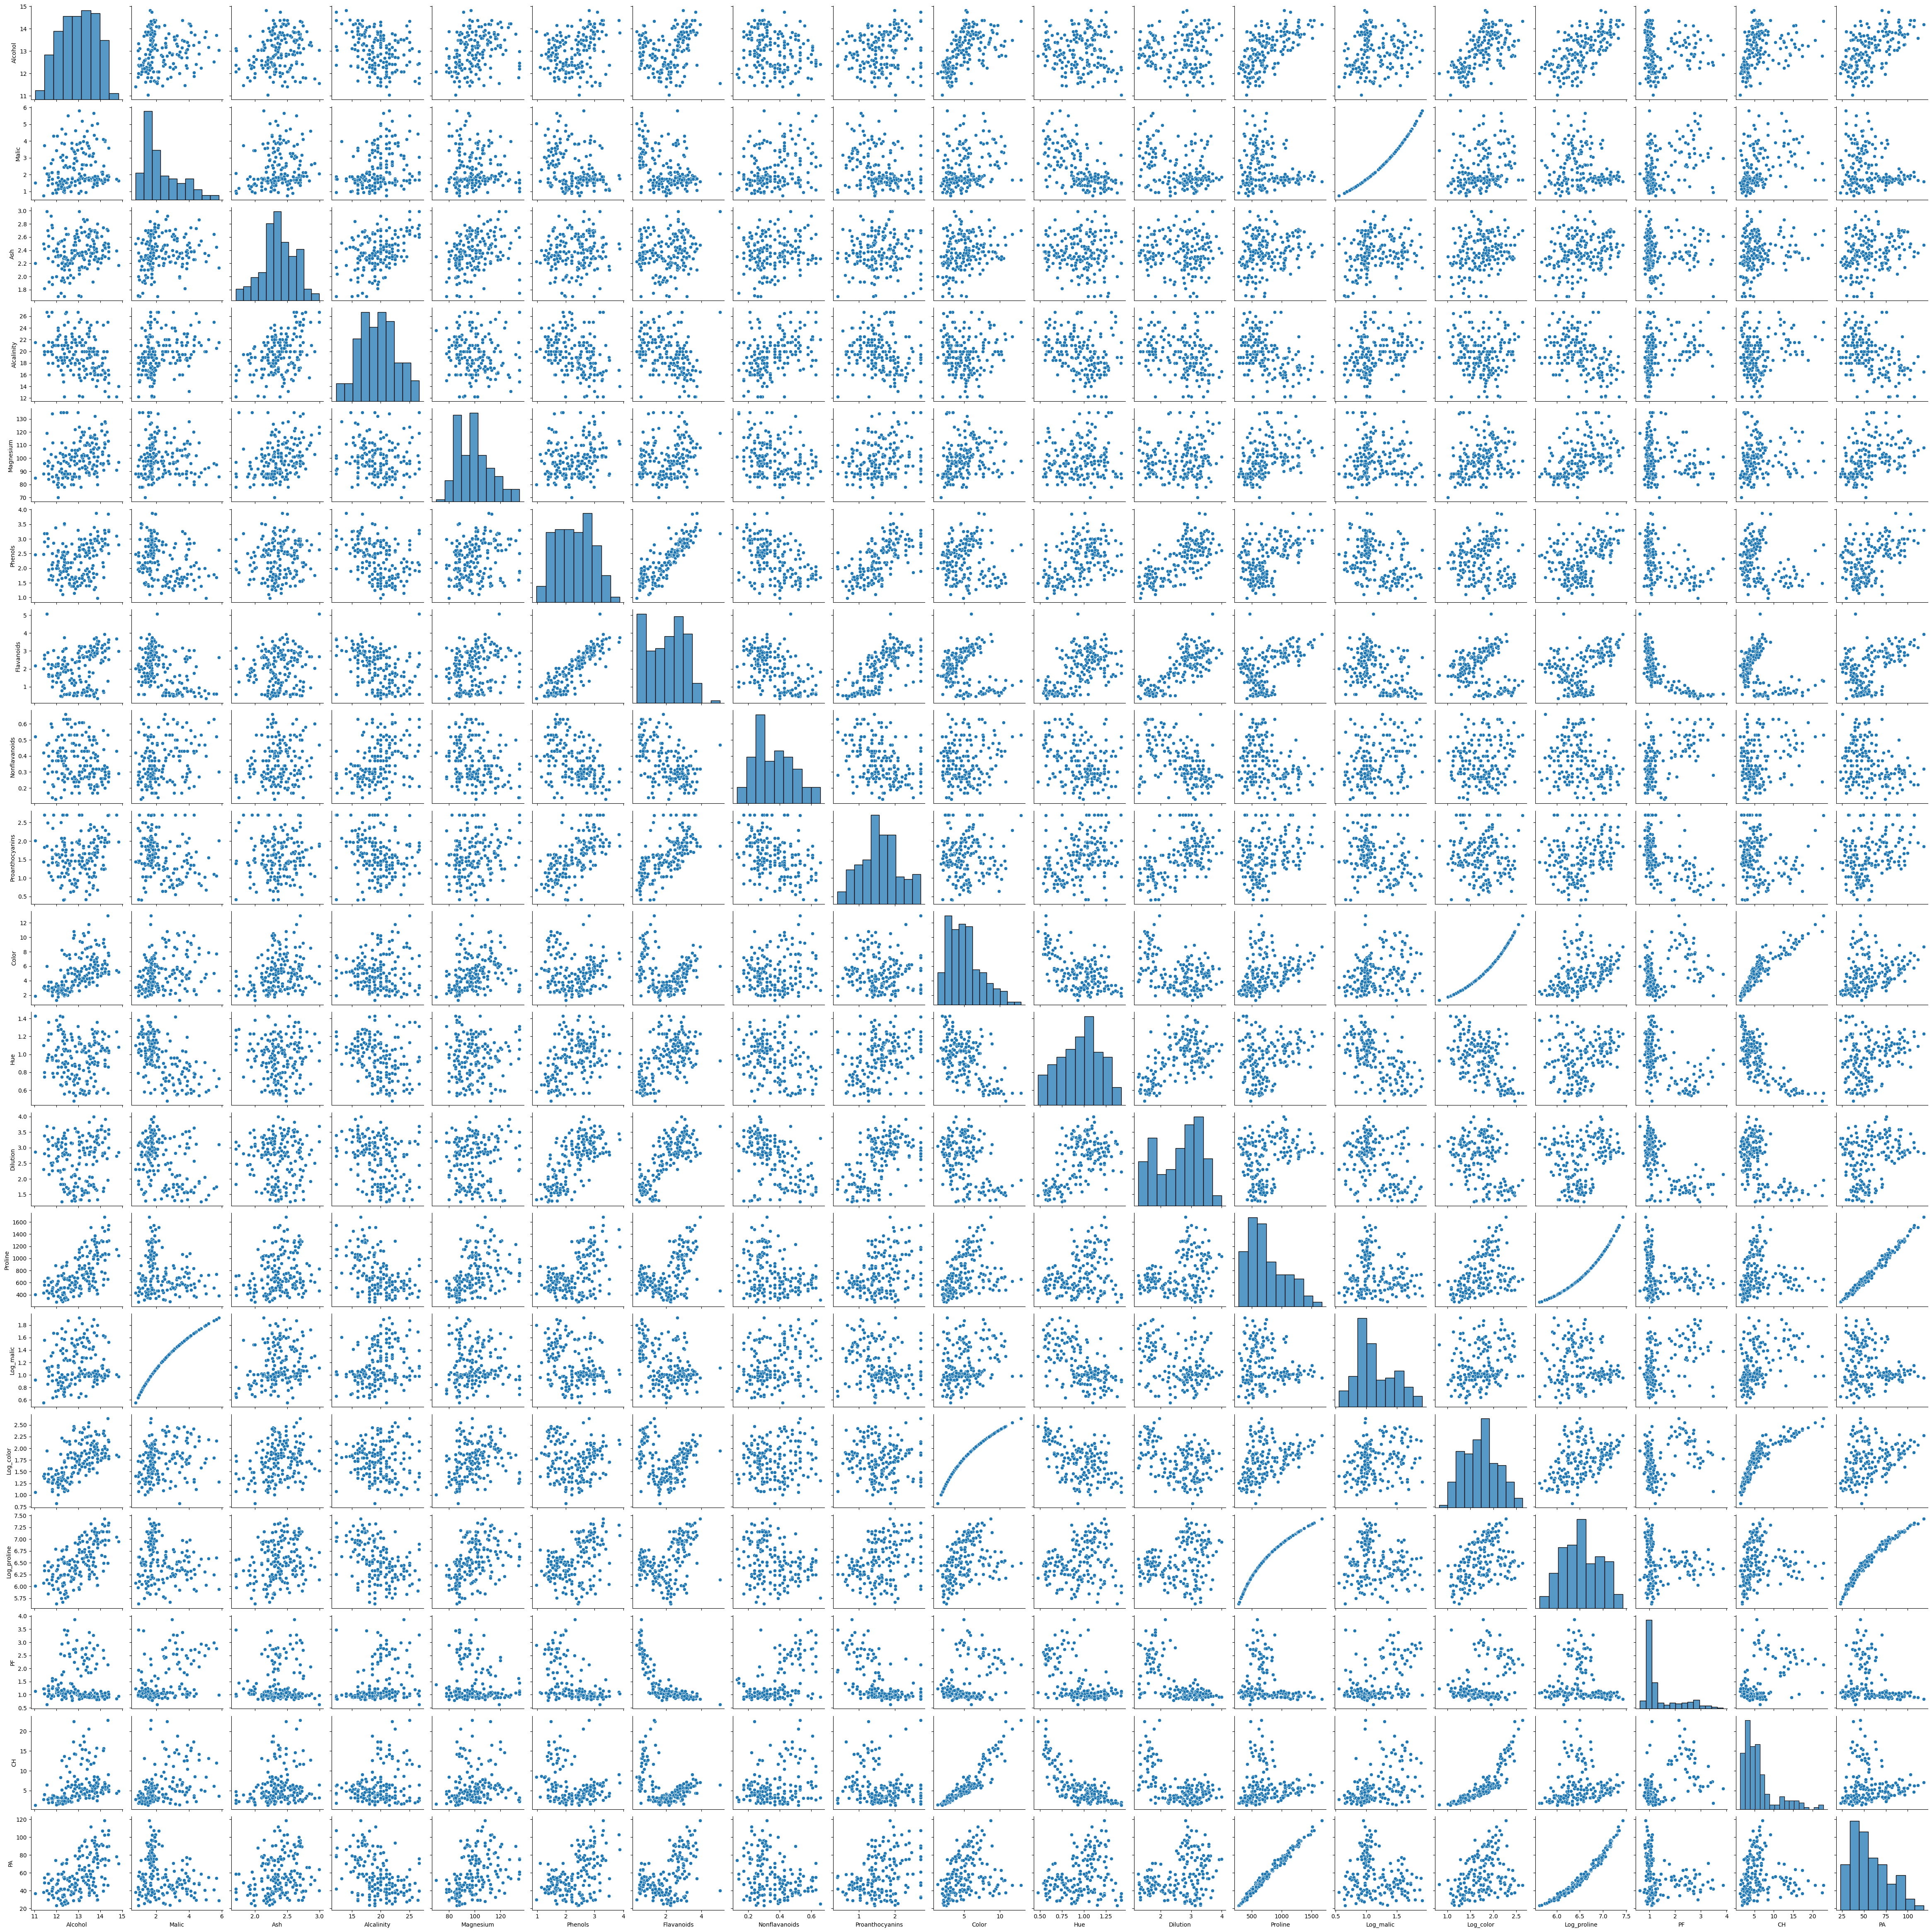

In [150]:
sns.pairplot(wine.iloc[:,1:], palette='Set2')
plt.show()

2. Correlation heatmap

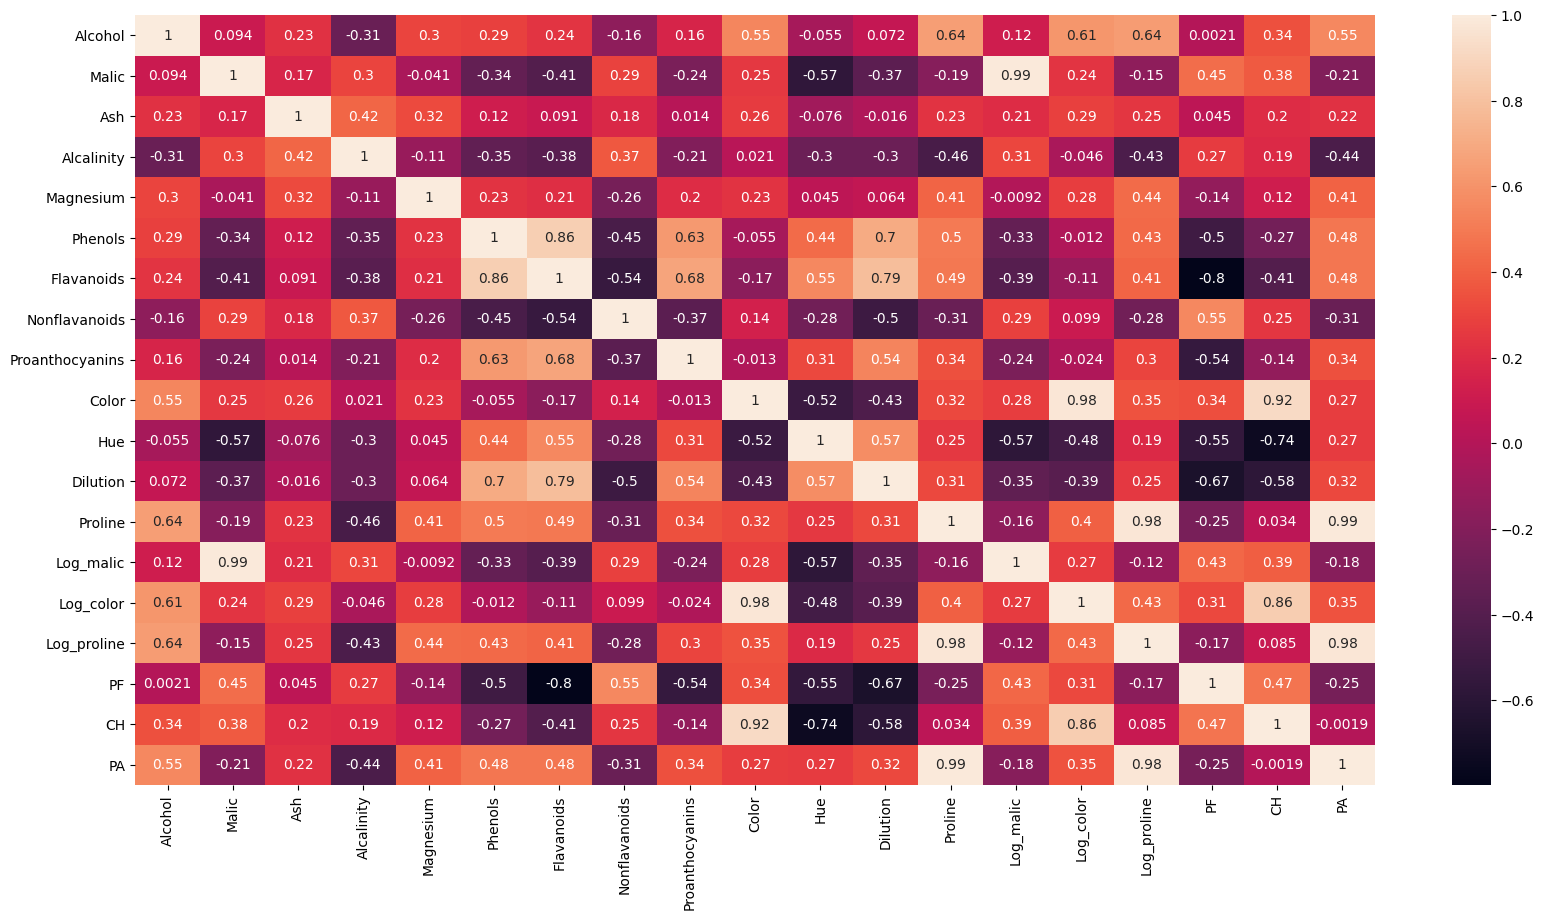

In [151]:
fig, ax = plt.subplots(figsize=(20, 10)) 
sns.heatmap(wine.iloc[:,1:].corr(), annot=True)
plt.show()

Feature relationships from the dataset:
1. Phenols and Flavanoids have positive correlation of 0.86: as the concentration of phenols increases, flavonoid content also increases significantly.
2. Dilution and Flavanoids have good amount of positive correlation as well of 0.79
3. Phenols and Dilution have positive correlation of 0.70<br>
Since Phenols and Flavanoids are strongly correlated, and Dilution is correlated with both, this suggests a common factor influencing all three. Possibly, a richer composition in phenols leads to higher recorded dilution values.
3. Flavanoids and Proanthocyanins have good correlation of 0.68 as well. This suggests that samples with high flavonoids are also rich in proanthocyanins
4. Alcohol and Proline have positive correlation of 0.64: Alcohol and Proline correlation may indicate that higher-quality or more mature grapes lead to higher alcohol content in fermentation.
5. Malic and Hue as negative correlation of -0.57. This correlation suggests that wines with higher Malic Acid content may appear less intense in color (lower Hue values), possibly because higher acidity prevents oxidation and color development.

In [152]:
labels =['Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Dilution']

phenols = wine[labels]
scaler = MinMaxScaler()
scaled_phenol = scaler.fit_transform(phenols)
scaled_phenol= pd.DataFrame(scaled_phenol, columns=phenols.columns)


In [153]:
categories= len(labels)
angles= np.linspace(0,2*np.pi,categories,endpoint=False).tolist()
angles.append(angles[0])

In [154]:
wine_types=wine['Type'].unique()
wine_types

[1, 2, 3]
Categories (3, int64): [1, 2, 3]

In [155]:
scaled_phenol.loc[:,'Type']=wine['Type']

In [156]:
scaled_phenol['Type'] = scaled_phenol['Type'].astype(int)

In [157]:
wine

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0      1    14.23   1.71  2.43      15.600      127.0     2.80        3.06   
1      1    13.20   1.78  2.14      12.216      100.0     2.65        2.76   
2      1    13.16   2.36  2.67      18.600      101.0     2.80        3.24   
3      1    14.37   1.95  2.50      16.800      113.0     3.85        3.49   
4      1    13.24   2.59  2.87      21.000      118.0     2.80        2.69   
..   ...      ...    ...   ...         ...        ...      ...         ...   
173    3    13.71   5.65  2.45      20.500       95.0     1.68        0.61   
174    3    13.40   3.91  2.48      23.000      102.0     1.80        0.75   
175    3    13.27   4.28  2.26      20.000      120.0     1.59        0.69   
176    3    13.17   2.59  2.37      20.000      120.0     1.65        0.68   
177    3    14.13   4.10  2.74      24.500       96.0     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  \
0             0.28            2.290   5.64  1.04      3.92     1065   
1             0.26            1.280   4.38  1.05      3.40     1050   
2             0.30            2.709   5.68  1.03      3.17     1185   
3             0.24            2.180   7.80  0.86      3.45     1480   
4             0.39            1.820   4.32  1.04      2.93      735   
..             ...              ...    ...   ...       ...      ...   
173           0.52            1.060   7.70  0.64      1.74      740   
174           0.43            1.410   7.30  0.70      1.56      750   
175           0.43            1.350  10.20  0.59      1.56      835   
176           0.53            1.460   9.30  0.60      1.62      840   
177           0.56            1.350   9.20  0.61      1.60      560   

     Log_malic  Log_color  Log_proline        PF         CH          PA  
0     0.996949   1.893112     6.971669  0.915033   5.423077   74.841883  
1     1.022451   1.682688     6.957497  0.960145   4.171429   79.545455  
2     1.211941   1.899118     7.078342  0.864198   5.514563   90.045593  
3     1.081805   2.174752     7.300473  1.103152   9.069767  102.992345  
4     1.278152   1.671473     6.601230  1.040892   4.153846   55.513595  
..         ...        ...          ...       ...        ...         ...  
173   1.894617   2.163323     6.608001  2.754098  12.031250   53.975201  
174   1.591274   2.116256     6.621406  2.400000  10.428571   55.970149  
175   1.663926   2.415914     6.728629  2.304348  17.288136   62.923888  
176   1.278152   2.332144     6.734592  2.426471  15.500000   63.781321  
177   1.629241   2.322388     6.329721  2.697368  15.081967   39.631989  

[178 rows x 20 columns]

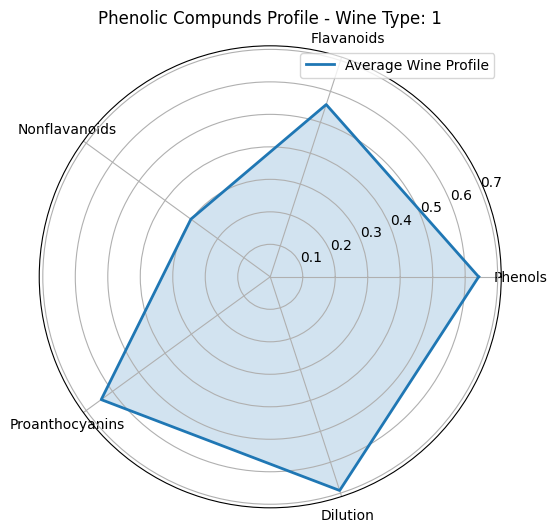

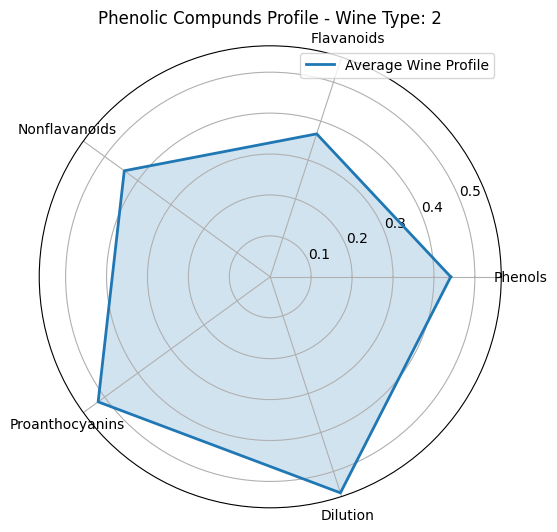

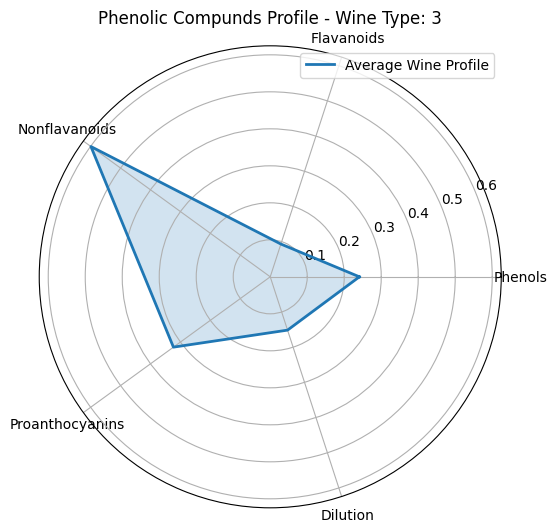

In [158]:
for wine_type in wine_types:
    wine_type_data = scaled_phenol[scaled_phenol['Type'] == wine_type]
    
    wine_means = wine_type_data[labels].mean().tolist()
    wine_means.append(wine_means[0])
    fig,ax= plt.subplots(figsize=(6,6),subplot_kw=dict(polar=True))
    ax.plot(angles, wine_means,linewidth=2, linestyle ='solid', label='Average Wine Profile')
    ax.fill(angles, wine_means, alpha=0.2)

    #ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    plt.title(f'Phenolic Compunds Profile - Wine Type: {wine_type}')
    plt.legend(loc="upper right")
    plt.show()

For each wine types, the phenolic compounds vary:
 1. For Wine type 1: They have less non flavonoids but more of other phenol compounds
 2. For Wine type 2: The have pretty mid range values
 3. For Wine type 3: Significantly different from other wine types, it have more amount of non flavanoids and less of other phenol compunds

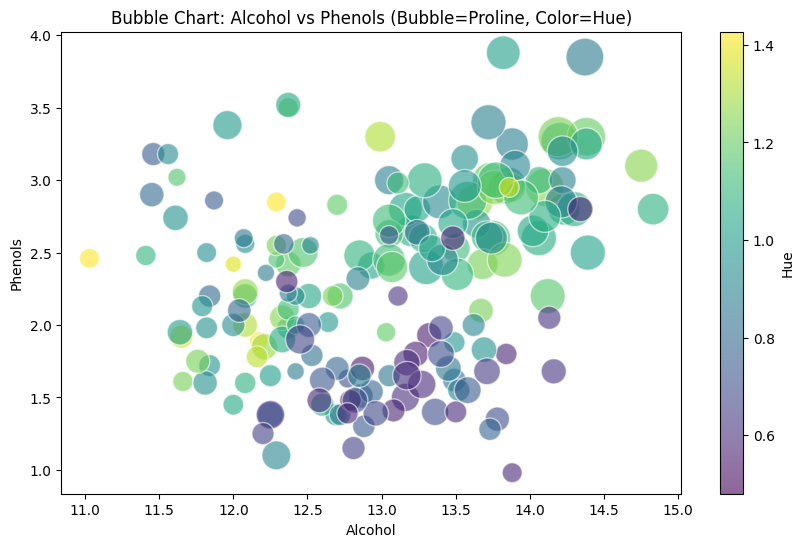

In [159]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(wine['Alcohol'], wine['Phenols'], 
                      s=wine['Proline']/2,  # Scale bubble size
                      c=wine['Hue'], cmap='viridis', alpha=0.6, edgecolors='w')

plt.colorbar(label='Hue')  # Color bar for hue values
plt.xlabel("Alcohol")
plt.ylabel("Phenols")
plt.title("Bubble Chart: Alcohol vs Phenols (Bubble=Proline, Color=Hue)")
plt.show()


- We can see that the bubble size(Proline) is larger when the Phenol and Alcohol content is high. 
- Another interesting insight is that lower phenol values have lowe hues.

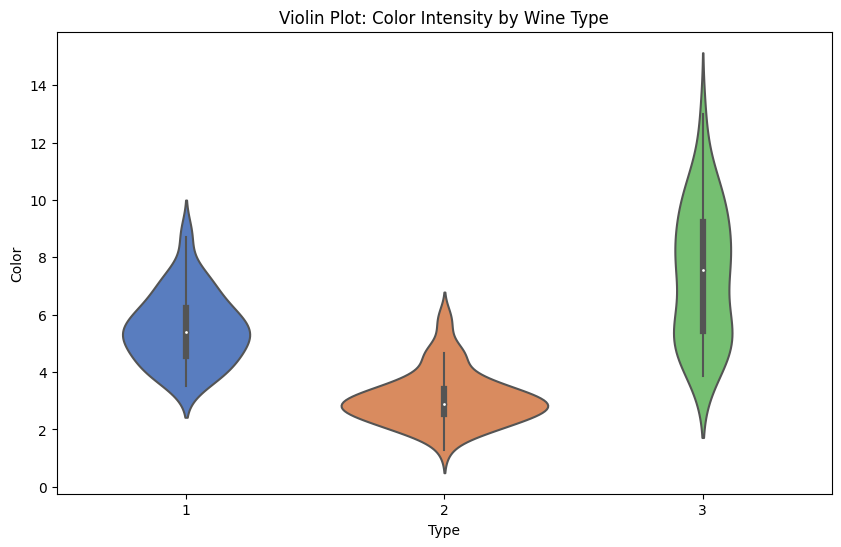

In [160]:
plt.figure(figsize=(10,6))
sns.violinplot(x="Type", y="Color", data=wine, palette="muted")
plt.title("Violin Plot: Color Intensity by Wine Type")
plt.show()


Wine Type 3 has varying color profiles compared to other two wine types and also mostly higher color corrresponds to Wine 3.  Wine 2 has its color profile around the mean.

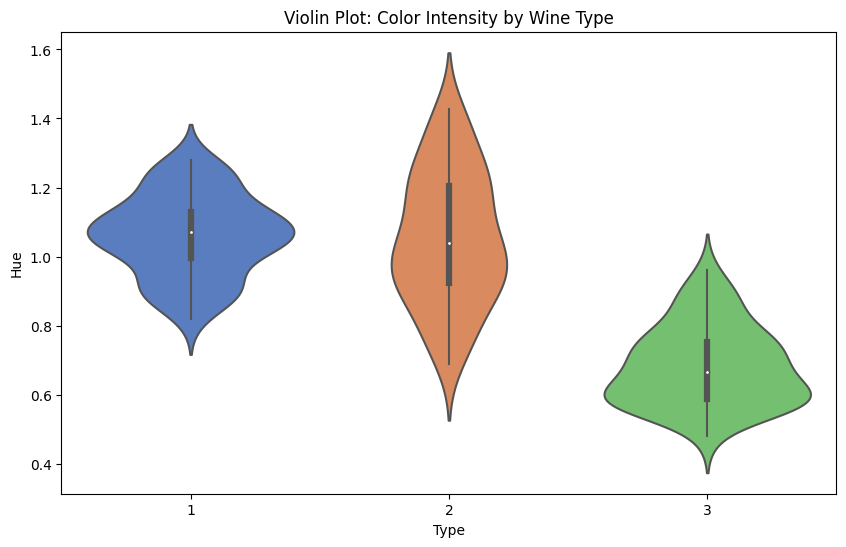

In [161]:
plt.figure(figsize=(10,6))
sns.violinplot(x="Type", y="Hue", data=wine, palette="muted")
plt.title("Violin Plot: Color Intensity by Wine Type")
plt.show()

Wine type 3 has less mean hue than other wine types

## <h1 style="color:indigo">2.  Dimensionality Reduction with PCA</h1>

1. Standardizing the features

In [162]:
selected_wine = wine.copy()

In [163]:
wine

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0      1    14.23   1.71  2.43      15.600      127.0     2.80        3.06   
1      1    13.20   1.78  2.14      12.216      100.0     2.65        2.76   
2      1    13.16   2.36  2.67      18.600      101.0     2.80        3.24   
3      1    14.37   1.95  2.50      16.800      113.0     3.85        3.49   
4      1    13.24   2.59  2.87      21.000      118.0     2.80        2.69   
..   ...      ...    ...   ...         ...        ...      ...         ...   
173    3    13.71   5.65  2.45      20.500       95.0     1.68        0.61   
174    3    13.40   3.91  2.48      23.000      102.0     1.80        0.75   
175    3    13.27   4.28  2.26      20.000      120.0     1.59        0.69   
176    3    13.17   2.59  2.37      20.000      120.0     1.65        0.68   
177    3    14.13   4.10  2.74      24.500       96.0     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  \
0             0.28            2.290   5.64  1.04      3.92     1065   
1             0.26            1.280   4.38  1.05      3.40     1050   
2             0.30            2.709   5.68  1.03      3.17     1185   
3             0.24            2.180   7.80  0.86      3.45     1480   
4             0.39            1.820   4.32  1.04      2.93      735   
..             ...              ...    ...   ...       ...      ...   
173           0.52            1.060   7.70  0.64      1.74      740   
174           0.43            1.410   7.30  0.70      1.56      750   
175           0.43            1.350  10.20  0.59      1.56      835   
176           0.53            1.460   9.30  0.60      1.62      840   
177           0.56            1.350   9.20  0.61      1.60      560   

     Log_malic  Log_color  Log_proline        PF         CH          PA  
0     0.996949   1.893112     6.971669  0.915033   5.423077   74.841883  
1     1.022451   1.682688     6.957497  0.960145   4.171429   79.545455  
2     1.211941   1.899118     7.078342  0.864198   5.514563   90.045593  
3     1.081805   2.174752     7.300473  1.103152   9.069767  102.992345  
4     1.278152   1.671473     6.601230  1.040892   4.153846   55.513595  
..         ...        ...          ...       ...        ...         ...  
173   1.894617   2.163323     6.608001  2.754098  12.031250   53.975201  
174   1.591274   2.116256     6.621406  2.400000  10.428571   55.970149  
175   1.663926   2.415914     6.728629  2.304348  17.288136   62.923888  
176   1.278152   2.332144     6.734592  2.426471  15.500000   63.781321  
177   1.629241   2.322388     6.329721  2.697368  15.081967   39.631989  

[178 rows x 20 columns]

In [164]:
selected_wine.drop(columns=['Color','Malic','Proline','Type'],axis=1, inplace=True)

In [165]:
selected_wine.head()

Alcohol   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  Nonflavanoids  \
0    14.23  2.43      15.600      127.0     2.80        3.06           0.28   
1    13.20  2.14      12.216      100.0     2.65        2.76           0.26   
2    13.16  2.67      18.600      101.0     2.80        3.24           0.30   
3    14.37  2.50      16.800      113.0     3.85        3.49           0.24   
4    13.24  2.87      21.000      118.0     2.80        2.69           0.39   

   Proanthocyanins   Hue  Dilution  Log_malic  Log_color  Log_proline  \
0            2.290  1.04      3.92   0.996949   1.893112     6.971669   
1            1.280  1.05      3.40   1.022451   1.682688     6.957497   
2            2.709  1.03      3.17   1.211941   1.899118     7.078342   
3            2.180  0.86      3.45   1.081805   2.174752     7.300473   
4            1.820  1.04      2.93   1.278152   1.671473     6.601230   

         PF        CH          PA  
0  0.915033  5.423077   74.841883  
1  0.960145  4.171429   79.545455  
2  0.864198  5.514563   90.045593  
3  1.103152  9.069767  102.992345  
4  1.040892  4.153846   55.513595

In [166]:
scaler = MinMaxScaler()
scaled_wine = scaler.fit_transform(selected_wine)
scaled_wine = pd.DataFrame(scaled_wine, columns=selected_wine.columns)

In [167]:
##Apply PCA

pca = PCA()
pca.fit(scaled_wine)


PCA()

#### Scree plot

In [168]:
explained_variance = pca.explained_variance_ratio_

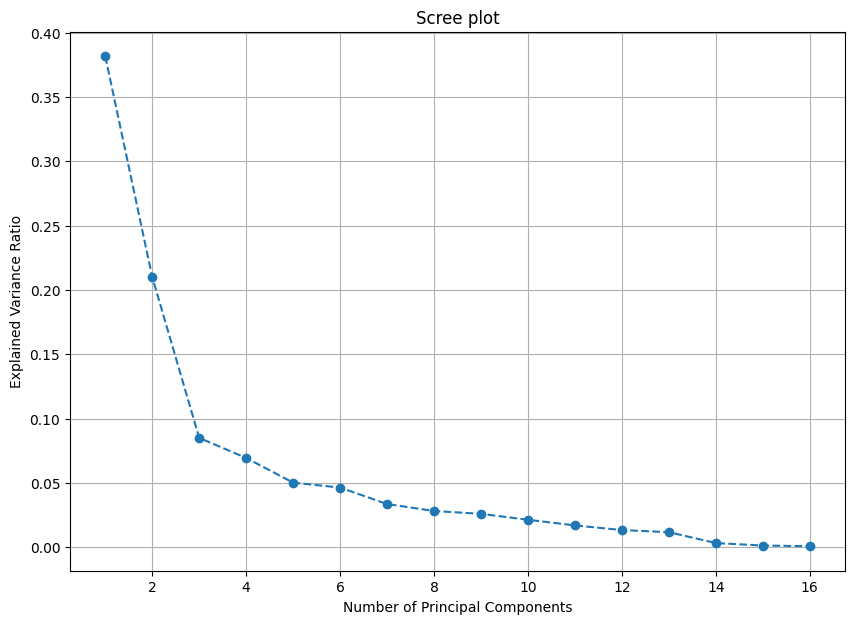

In [169]:
#plot scree plot

plt.figure(figsize=(10,7))
plt.plot(range(1,len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree plot')
plt.grid()

plt.show()

From Number of Principal components = 3 onwards the decrease in explained variance is slower. But we will check with cumulative plot and try to retained 80% of the information

#### Cumulative explained variance plot

In [170]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

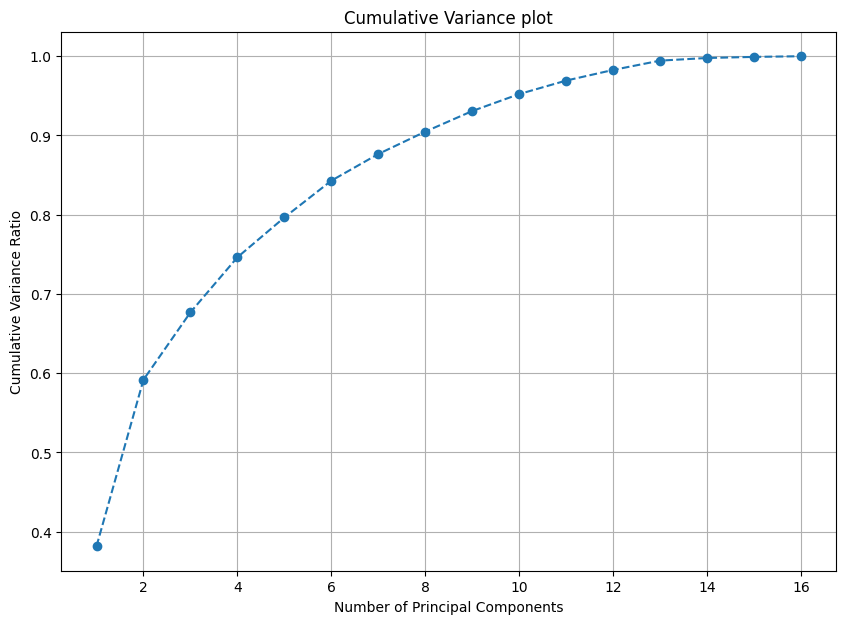

In [171]:
#plot cumulative variance plot

plt.figure(figsize=(10,7))
plt.plot(range(1,len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.title('Cumulative Variance plot')
plt.grid()

plt.show()

The chosen optimal number of components = 6

In [172]:
num_components = 6
pca6 = PCA(n_components=num_components)
pca_wine = pca6.fit_transform(scaled_wine)

In [173]:
pc_columns=[f'PC{i+1}' for i in range(num_components)]
df_pca_wine6 = pd.DataFrame(pca_wine, columns=pc_columns)
df_pca_wine6.head()

PC1       PC2       PC3       PC4       PC5       PC6
0 -0.787164 -0.363242 -0.045083 -0.063262  0.074022 -0.044359
1 -0.563278 -0.076744  0.433989 -0.026323 -0.028455 -0.210202
2 -0.639172 -0.333417 -0.259918 -0.008360 -0.125170  0.030701
3 -0.818586 -0.747421 -0.080331 -0.131536 -0.105153 -0.011203
4 -0.245067 -0.113734 -0.439472  0.188837  0.104992 -0.052193

In [174]:
pca6.explained_variance_ratio_

array([0.38166663, 0.21009744, 0.08504766, 0.06945474, 0.0502722 ,
       0.04641941])

## <h1 style="color:indigo">3. Clustering with Original Data</h1>

In [175]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

scores=pd.DataFrame([])
ss=[]    # we will store the silhoutte scores
dbi=[]  #store Davies-Bouldin scores
final_wcss=[] #stores wcss scores

In [176]:


def plot_tsne(data, labels, title="TSNE Cluster Visualization"):
    """
    Plots a 2D TSNE visualization of clusters.
    
    Parameters:
    - data: Scaled feature dataset (numpy array or DataFrame)
    - labels: Cluster labels (1D array or list)
    - title: Plot title (string)
    
    Returns:
    - TSNE Scatter plot
    """
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(data)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=labels, palette="viridis", alpha=0.7)
    plt.title(title)
    plt.xlabel("TSNE Component 1")
    plt.ylabel("TSNE Component 2")
    plt.legend(title="Clusters")
    plt.show()


As we have dealt with outliers, we will go with kmeans clustering for clustering our data points. We will put of cluster results into a new dataframe 'data' along with the features

In [177]:
data = selected_wine.copy()

In [178]:
# Determine optimal K using Elbow Method
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_wine)
    wcss.append(kmeans.inertia_)

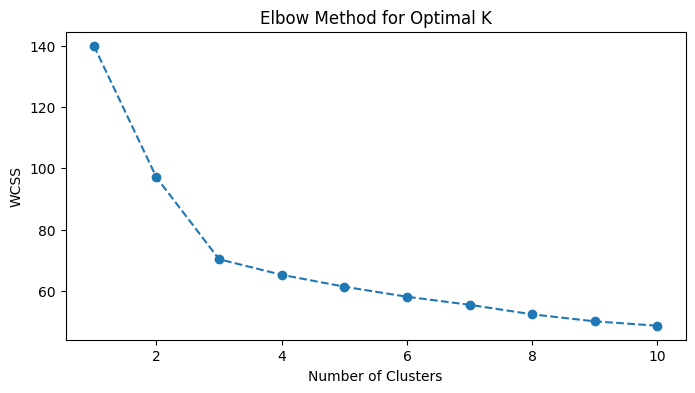

In [179]:
### 1️⃣ K-MEANS CLUSTERING ###


# Plot Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

We will use k =3 as our optimal number of clusters and check the silhouette scores and Davies-Bouldin index for our model.

In [180]:
# Apply K-Means with optimal K () K=3 from elbow method)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
selected_wine['KMeans_Cluster_Original'] = kmeans.fit_predict(scaled_wine)
ss.append( silhouette_score(scaled_wine, selected_wine['KMeans_Cluster_Original'] ))

In [181]:
dbi.append(davies_bouldin_score(scaled_wine, selected_wine['KMeans_Cluster_Original']))

In [182]:

final_wcss.append(kmeans.inertia_)

### Plot the cluster

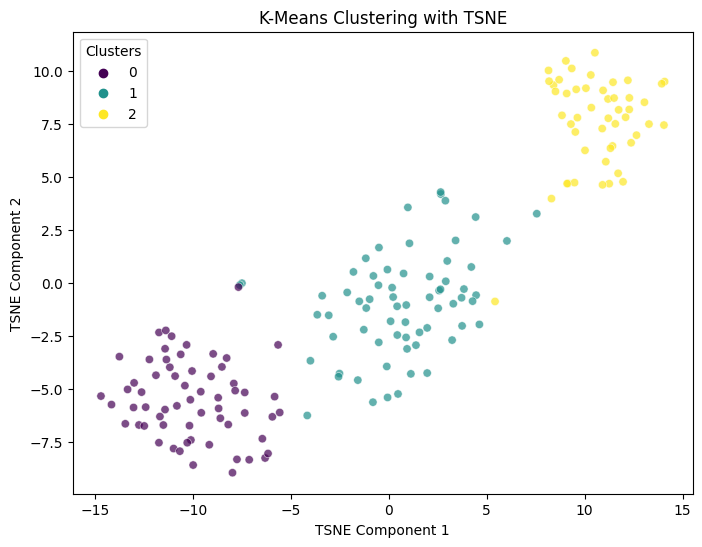

In [183]:
plot_tsne(scaled_wine, selected_wine['KMeans_Cluster_Original'], title="K-Means Clustering with TSNE")

## <h1 style="color:indigo">4. Clustering with PCA Data</h1>

In [184]:
# Apply K-Means with optimal K () K=3 from elbow method)
kmeans6 = KMeans(n_clusters=3, random_state=42, n_init=10)
selected_wine['KMeans_Cluster_6'] = kmeans6.fit_predict(df_pca_wine6)
ss.append(silhouette_score(df_pca_wine6, selected_wine['KMeans_Cluster_6'] ))

In [185]:
dbi.append(davies_bouldin_score(df_pca_wine6, selected_wine['KMeans_Cluster_6']))

In [186]:
final_wcss.append(kmeans6.inertia_)

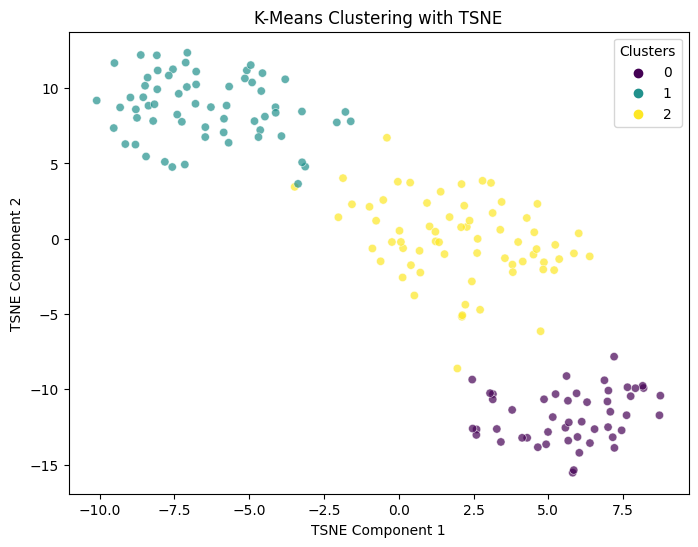

In [187]:
plot_tsne(df_pca_wine6, selected_wine['KMeans_Cluster_6'], title="K-Means Clustering with TSNE")

#### Let's check the results when we make the number of components 8 and 4 respectively

In [188]:
num_components = 8
pca = PCA(n_components=num_components)
pca_wine = pca.fit_transform(scaled_wine)
pc_columns=[f'PC{i+1}' for i in range(num_components)]
df_pca_wine = pd.DataFrame(pca_wine, columns=pc_columns)
df_pca_wine.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.787164 -0.363242 -0.045083 -0.063262  0.074022 -0.044359  0.126476   
1 -0.563278 -0.076744  0.433989 -0.026323 -0.028455 -0.210202 -0.057501   
2 -0.639172 -0.333417 -0.259918 -0.008360 -0.125170  0.030701  0.155821   
3 -0.818586 -0.747421 -0.080331 -0.131536 -0.105153 -0.011203 -0.059645   
4 -0.245067 -0.113734 -0.439472  0.188837  0.104992 -0.052193  0.058974   

        PC8  
0  0.230611  
1  0.027601  
2 -0.239116  
3  0.002977  
4  0.186863

In [189]:
# Apply K-Means with optimal K () K=3 from elbow method)
kmeans8 = KMeans(n_clusters=3, random_state=42, n_init=10)
selected_wine['KMeans_Cluster8'] = kmeans8.fit_predict(df_pca_wine)
ss.append(silhouette_score(df_pca_wine, selected_wine['KMeans_Cluster8'] ))

In [190]:
dbi.append(davies_bouldin_score(df_pca_wine, selected_wine['KMeans_Cluster8']))

In [191]:
final_wcss.append(kmeans8.inertia_)

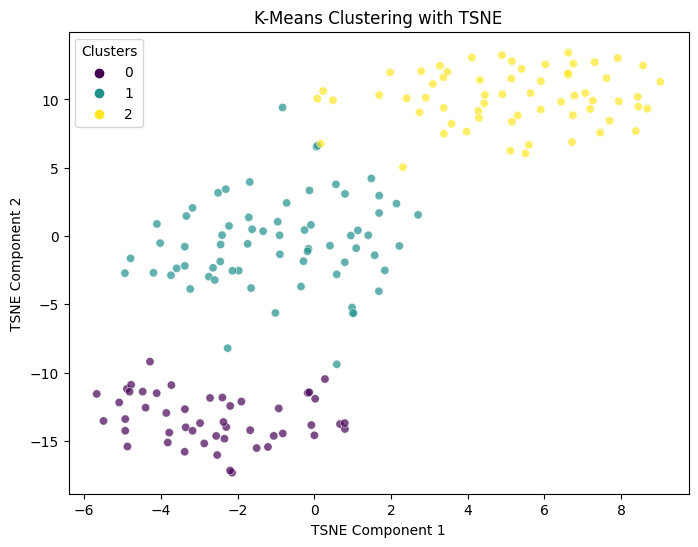

In [192]:
plot_tsne(df_pca_wine, selected_wine['KMeans_Cluster8'], title="K-Means Clustering with TSNE")

In [193]:
num_components = 4
pca = PCA(n_components=num_components)
pca_wine = pca.fit_transform(scaled_wine)
pc_columns=[f'PC{i+1}' for i in range(num_components)]
df_pca_wine = pd.DataFrame(pca_wine, columns=pc_columns)
df_pca_wine.head()

PC1       PC2       PC3       PC4
0 -0.787164 -0.363242 -0.045083 -0.063262
1 -0.563278 -0.076744  0.433989 -0.026323
2 -0.639172 -0.333417 -0.259918 -0.008360
3 -0.818586 -0.747421 -0.080331 -0.131536
4 -0.245067 -0.113734 -0.439472  0.188837

In [194]:
# Apply K-Means with optimal K () K=3 from elbow method)
kmeans4 = KMeans(n_clusters=3, random_state=42, n_init=10)
selected_wine['KMeans_Cluster4'] = kmeans4.fit_predict(df_pca_wine)
ss.append(silhouette_score(df_pca_wine, selected_wine['KMeans_Cluster4'] ))

In [195]:
dbi.append(davies_bouldin_score(df_pca_wine, selected_wine['KMeans_Cluster4']))

In [196]:
final_wcss.append(kmeans4.inertia_)

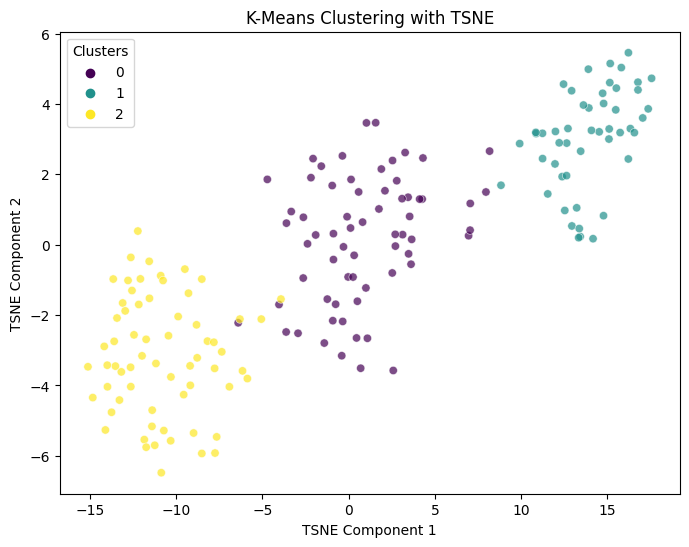

In [197]:
plot_tsne(df_pca_wine, selected_wine['KMeans_Cluster4'], title="K-Means Clustering with TSNE")

In [198]:
scores['Features'] =["Original","6 Components","8 Components", "4 Components"]
scores["Silhouette"]= ss
scores["Davies-Bouldin"]=dbi
scores["wcss"]=final_wcss

In [199]:
scores

Features  Silhouette  Davies-Bouldin       wcss
0      Original    0.318341        1.267106  70.430370
1  6 Components    0.389616        1.024424  48.552411
2  8 Components    0.357039        1.129290  57.197807
3  4 Components    0.450472        0.882251  35.174291

Interpretation and analysis of the results at the end**

### PCA Loading

With PCA loading we will be able to see the represention how much each original feature contributes to the principal components. They indicate the relationship between the original variables and the new principal component axes.

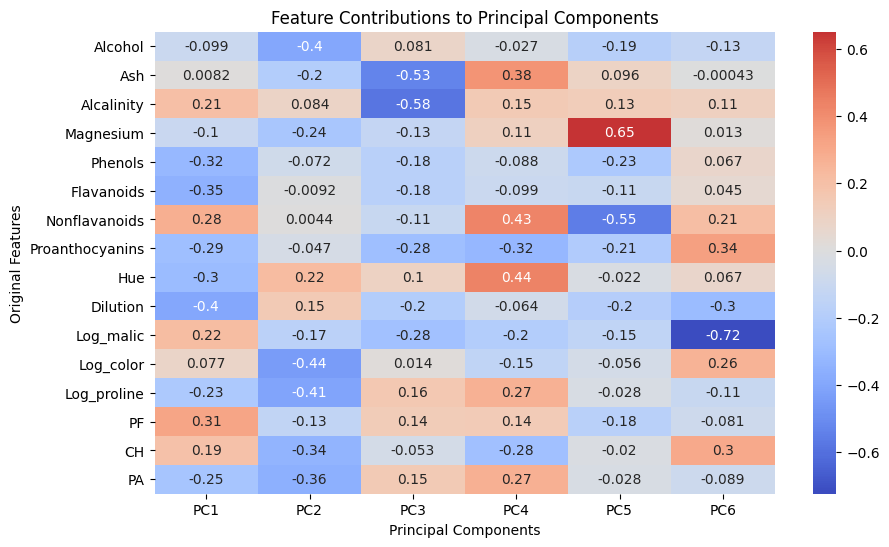

In [107]:
# Extract PCA loadings (feature contributions to principal components)
loadings = pca6.components_.T  # Transpose to get features as rows
loading_df = pd.DataFrame(loadings, index=scaled_wine.columns, columns=['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6'])

# Plot PCA Loadings as a Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(loading_df, annot=True, cmap='coolwarm', center=0)
plt.title("Feature Contributions to Principal Components")
plt.xlabel("Principal Components")
plt.ylabel("Original Features")
plt.show()

Phenol compounds seems to be have given importance for getting the clusters. From our EDA we have seen how different types of wine had different phenolic compositions and it seems like the algorithm did a fair job of catching it.

## <h1 style="color:indigo">5. Final Analysis and Interpretation</h1>

- As we increase the number of components our silhoutte scores decreasing
- The Davies_bouldin_score increases as we increase the number of components. 
- The scores will eventually become equal to the scores obtained from clustering with original dataset if we increase the components.This is obvious as it regain it's 100% information and also the numberof features will become equal to the original dataset.
- The less number of components will also affect the measuring of distance

Drawback of PCA:
- Rendering the resulting dimensions becomes less interpretable, which may complicate the understanding of why certain clusters form. 


## <h1 style="color:indigo">6. Conclusion </h1>

- Key Findings:

1. PCA helped reduce dimensionality while preserving most of the variance.
2. Clustering performed on PCA-transformed data resulted in [similar] clustering performance.
3. The silhouette score [ improved] after applying PCA.
- Impact of PCA:

1. PCA helps in visualization and computational efficiency.
2. PCA is beneficial when there are too many features, making clustering harder.While PCA can improve efficiency, it should be applied carefully to avoid losing important information.
- Practical Implications:

1. PCA is useful when working with high-dimensional datasets.
2. If clustering accuracy is critical, retaining more components may be necessary.